In [1]:
import sys 
sys.path.append('../') 
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  

from utils.vis import plot_masked_image_3x3, get_masked_image_from_json 

In [2]:
len(os.listdir('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/5findings/v2'))

136848

In [4]:
v2_output_df = pd.read_csv('/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/outputs/5findings/v2/output-01-05-05-04-36.csv') 
len(v2_output_df) 
v2_output_df.head() 

,image_id,PredictionString
0,SIIM/SIIM_CXR_001628.jpg,1 0.9994668960571289 588 150 929 619
1,SIIM/SIIM_CXR_004176.jpg,-1
2,SIIM/SIIM_CXR_008111.jpg,NaN
3,SIIM/SIIM_CXR_005091.jpg,0 0.9998109936714172 290 348 481 611 0 0.99981...
4,SIIM/SIIM_CXR_009751.jpg,NaN


In [6]:
v2_siim_df = v2_output_df[v2_output_df['image_id'].str.contains('SIIM')] 

print('SIIM:', len(v2_siim_df), len(v2_siim_df[v2_siim_df['PredictionString'].notna()])) 

SIIM: 10675 3757


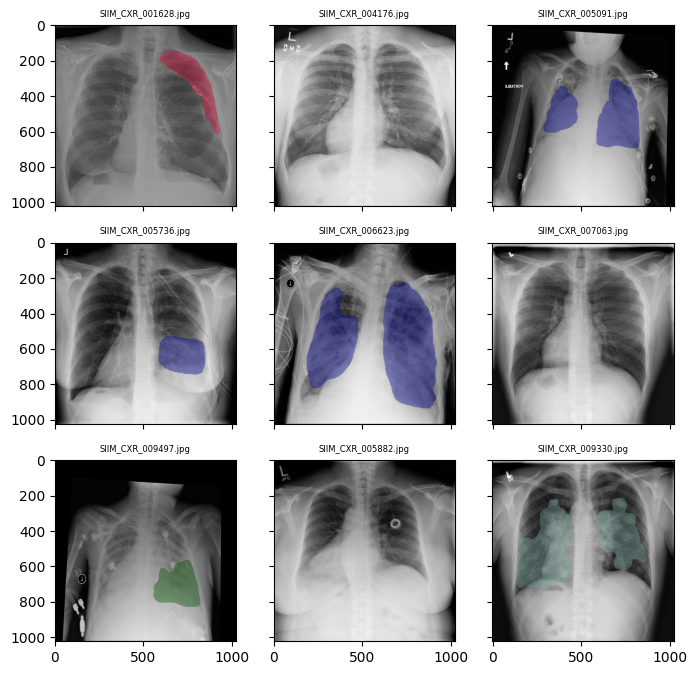

In [14]:
image_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/images'
label_root_dir = '/ai-data/chest/kjs2109/pseudo_label_dataset/chestALL/annotations/5findings/v2' 

v2_siim_disease_list = [fname.split('/')[-1] for fname in v2_siim_df['image_id'][v2_siim_df['PredictionString'].notna()].tolist()]

plot_masked_image_3x3(image_root_dir, label_root_dir, v2_siim_disease_list[:9]) 

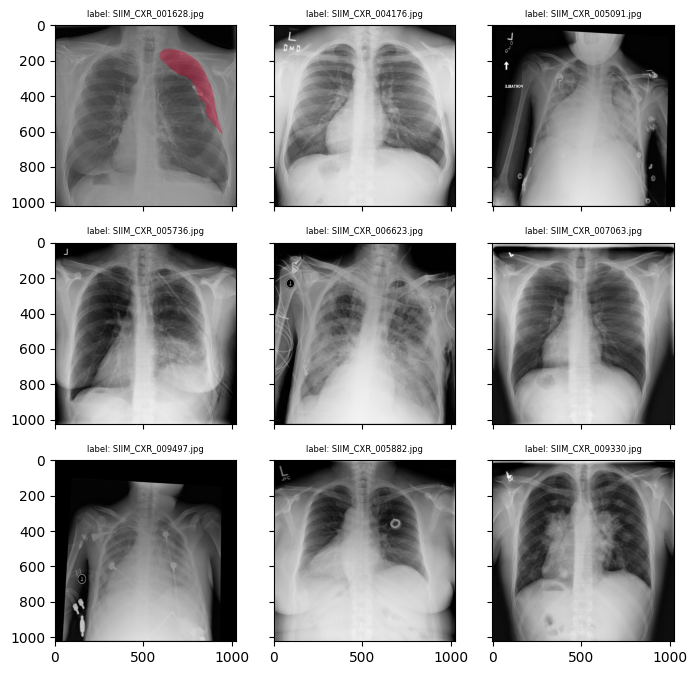

In [15]:
siim_image_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/images'
siim_label_dir = '/ai-data/chest/DATA/PublicDataset/SIIM/anns' 

# siim_label_fnames = v4_siim_disease_list['new_image_fname'].tolist()[9:18]  

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8, 8)) 

for i, fname in enumerate(v2_siim_disease_list[:9]): 
    image_path = os.path.join(siim_image_dir, fname) 
    label_path = os.path.join(siim_label_dir, fname.replace('jpg', 'json')) 

    masked_image = get_masked_image_from_json(image_path, label_path)  
    axes[i//3, i%3].imshow(masked_image) 
    axes[i//3, i%3].set_title(f'label: {fname}', fontsize=6)

plt.show()  